In [20]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

In [37]:
def show_comparison(original, modified, modified_name, gray = True):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    if gray:
        ax1.imshow(original, cmap= "gray")
        ax1.set_title('Original')
        ax1.axis('off')
        ax2.imshow(modified, cmap = "gray")
        ax2.set_title(modified_name)
        ax2.axis('off')
    else:
        ax1.imshow(original)
        ax1.set_title('Original')
        ax1.axis('off')
        ax2.imshow(modified)
        ax2.set_title(modified_name)
        ax2.axis('off')
    io.show()

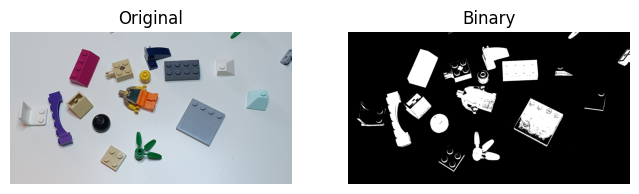

In [16]:
file_path = "data/lego_4_small.png"
img = io.imread(file_path)
img_gray = color.rgb2gray(img)
otsu_threshold_val = threshold_otsu(img_gray)
img_binary = img_gray < otsu_threshold_val
img_binary = img_as_float(img_binary)
show_comparison(img, img_binary, "Binary")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


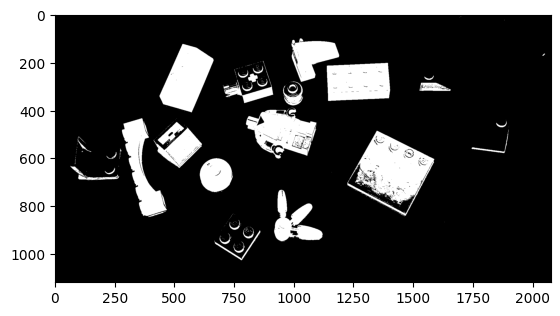

In [19]:
clear_border_img = segmentation.clear_border(img_binary)
print(clear_border_img)
plt.imshow(clear_border_img, cmap = "gray")

In [28]:
footprint = disk(5)
closed_img = closing(img_binary, footprint)
opened_closed_img = opening(closed_img, footprint)

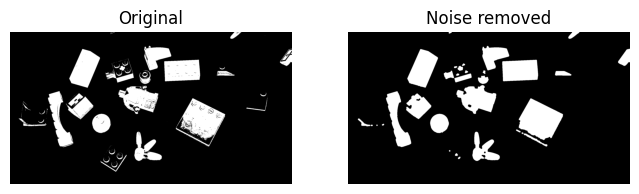

In [29]:
show_comparison(img_binary, opened_closed_img, "Noise removed")


In [33]:
#Finding labels
label_img = measure.label(opened_closed_img)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 32


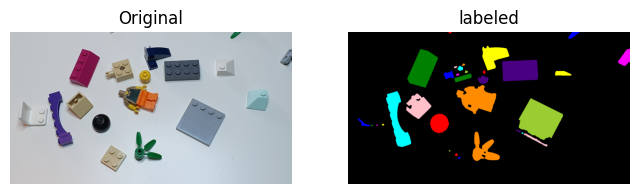

In [36]:
labeled = label2rgb(label_img)
show_comparison(img, labeled, "labeled")

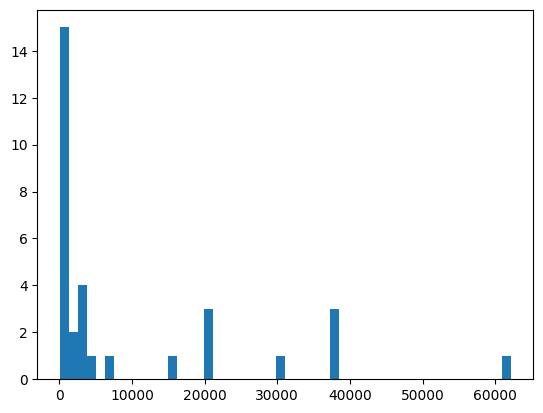

In [39]:
region_props = measure.regionprops(label_img)

areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

In [44]:
print(region_props[0].bbox)

(0, 741, 12, 765)
